### **Linear Regression**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import set_config

set_config(display = 'diagram')


class Model:

    def hx(self, x, theta, i):
        return np.dot(theta.T, x[i])

    def pdiff_j(self, m, x, y, theta, j):
        partial_diff = 0.0
        for i in range(m):
            partial_diff += (self.hx(x,theta,i) - y[i]) * x[i][j]
        return partial_diff / m

    def fit(self, x, y, learning_rate=0.01, training_cycle=1000):
        m, n = x.shape
        theta = np.zeros((n,))

        for _ in range(training_cycle):
            for j in range(n):
                theta[j] -= learning_rate * self.pdiff_j(m, x, y, theta, j)

        self.theta = theta

    def predict(self, x):
        return np.dot(x,self.theta)


def main():

    df = pd.read_csv("/content/Linear Regression - Sheet1.csv")
    x0 = np.ones([df.shape[0],])
    x1 = df['X'].to_numpy()

    x = np.vstack([x0, x1])
    x = x.T

    y = df['Y'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



    trf1 = ColumnTransformer([
        ('tnf1', StandardScaler(), [1])
    ], remainder='passthrough')

    trf2 = Model()

    pipe = Pipeline([
        ('trf1',trf1),
        ('trf2', trf2)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)



if __name__ == "__main__":
    main()


### **Wrighted Linear Regression**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class Model_Weighted:

    def hx(self, x, theta, i):
        return np.dot(theta.T, x[i])

    def omega(self, x, i, tau=.25):
        delta = (self.X[i] - x) ** 2
        delta = delta.sum()
        # print(self.X[i], x, delta)
        alpha = (-delta / (2 * (tau ** 2)))
        return np.exp(alpha)

    def pdiff_j(self, m, x, y, theta, j):
        partial_diff = 0.0
        for i in range(m):
            partial_diff += self.omega(x, i) * (self.hx(self.X, theta, i) - y[i]) * self.X[i][j]
        return partial_diff / m

    def predict(self, x, learning_rate=0.1, training_cycle=1000):
        m, n = self.X.shape
        theta = np.ones([n,])

        for _ in range(training_cycle):
            for j in range(n):
                slope = learning_rate * self.pdiff_j(m, x, self.Y, theta, j)
                theta_old = theta[j]
                theta[j] -= slope
                if(theta[j]- theta_old  < 1e-4):
                  break
                # print(theta)

        return np.dot(theta.T, x)

    def fit(self, x, y):
        self.X = x
        self.Y = y


def main():
    # Load data
    size = 25
    x0 = np.ones([size, ])
    x1 = np.linspace(-3.5,3.5,size)

    x = np.vstack([x0, x1])
    x = x.T

    # Scaling
    # scaler = StandardScaler()
    # x_scaled = scaler.fit_transform(x)

    y = np.cos(x[:,1])
    # print(y.shape, x.shape)

    # Create and fit the model
    md = Model_Weighted()
    md.fit(x, y)

    # Make predictions
    num =100
    x_test = np.vstack([np.ones([num,]), np.linspace(-3.5,3.5,num)]).T# Example test input
    y_test = np.cos(x_test[:,1])
    # print(x_test.shape, y_test.shape)
    y_pred = np.ones([num,])
    for i in range(num):
      y_pred[i] = md.predict(x_test[i])
      print("X = ",x_test[i][1],"Predicted value:", y_pred[i])



    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test[:, 1], y_test, color='blue', label='Actual')  # Plot actual data points
    plt.scatter(x_test[:, 1], y_pred, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Predicted vs Actual')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()


### Logistic regression

[-1.08803835  1.92604531  1.05855987]
Accuracy: 0.85


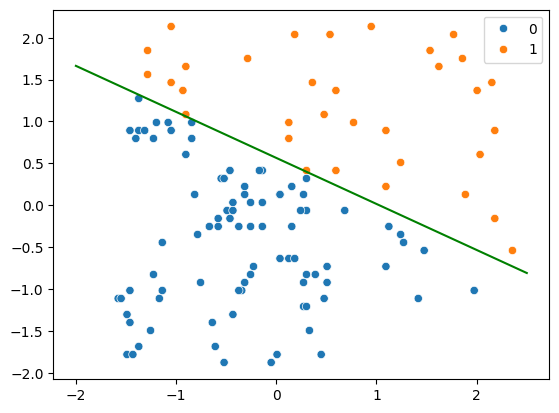

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

class Model:

    def hx(self, x):
        return 1/(1 + np.exp(-x) )  # Adjusted for numerical stability

    def fit(self, x, y, learning_rate=0.01, training_cycle=1000):
        x = np.insert(x,0,1,axis = 1)
        self.theta = np.random.random(x.shape[1])

        for _ in range(training_cycle):
          y_pred = self.hx( np.dot( x, self.theta ))

          theta_diff = np.dot(x.T, y - y_pred )/x.shape[0]

          self.theta += learning_rate * theta_diff

        print(self.theta)

    def predict(self, x):
        x = np.insert(x,0,1,axis =1)
        h = self.hx(np.dot(x,self.theta))
        h = (h > 0.5).astype(int)
        return h

def main():
    df = pd.read_csv("/content/Social_Network_Ads.csv")

    p1 = 'Age'
    p2 = 'EstimatedSalary'
    o1 = 'Purchased'

    scaler = StandardScaler()
    df[p1] = scaler.fit_transform(df[[p1]])  # Updated to scale the feature correctly

    scaler1 = StandardScaler()
    df[p2] = scaler1.fit_transform(df[[p2]])

    x = np.hstack([df[[p1]].to_numpy(),df[[p2]].to_numpy()])
    y = df[o1].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    md = Model()
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    m = -(md.theta[2]/md.theta[1])
    b = -(md.theta[0]/md.theta[1])

    x_plot = np.linspace(-2,2.5,5)
    y_plot = m * x_plot + b


    sns.scatterplot(x = X_test[:,1],y = X_test[:,0], hue = y_pred)
    plt.plot(x_plot,y_plot, color = "green")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datesets import make_classification

class GDA:
  def __init__(self,):
